# Myopia Clusters

In [64]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## Retrieve the Data

In [65]:
# Import the data
df = pd.read_csv('Resources/myopia.csv')
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [66]:
# Remove the "MYOPIC" column from the dataset. 
droped_df = df.drop('MYOPIC', axis=1)
droped_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [67]:
# Remove null value and duplicated data
isnonull_df = droped_df.dropna()
cleaned_df = isnonull_df.drop_duplicates()
cleaned_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [68]:
# Standardise dataset
Scaler = StandardScaler()
data_scaled = Scaler.fit_transform(cleaned_df)
scaled_df = pd.DataFrame(data_scaled) 
scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,0.681765,0.884045,0.685585,0.987138,-0.996769
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.672996,-0.165935,-0.999941,0.987138,1.003241
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,1.003241
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.672996,1.059042,-0.188392,-1.013030,-0.996769


## Apply Dimensionality Reduction

In [69]:
# Initialise PCA model and get principal components to cover 90% of the data.
pca = PCA(n_components=0.9)
myopia_pca = pca.fit_transform(scaled_df)
myopia_pca_df = pd.DataFrame(myopia_pca)
myopia_pca_df

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183
...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581


In [70]:
# Initialise t-SNE model and do further Dimensionality Reduction
tsne = TSNE(learning_rate=200,n_iter=10000)
tsne_features = tsne.fit_transform(myopia_pca_df)
tsne_features.shape

/Users/huan-jhelin/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



(618, 2)

In [71]:
tsne_features

array([[  2.3434334 ,  29.96622   ],
       [ -4.8394723 , -15.953122  ],
       [ 12.72974   ,  10.081964  ],
       ...,
       [ 23.03193   ,  -6.094434  ],
       [ 10.024225  ,  19.281271  ],
       [ -0.41913798, -13.419513  ]], dtype=float32)

In [72]:
df['X'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]

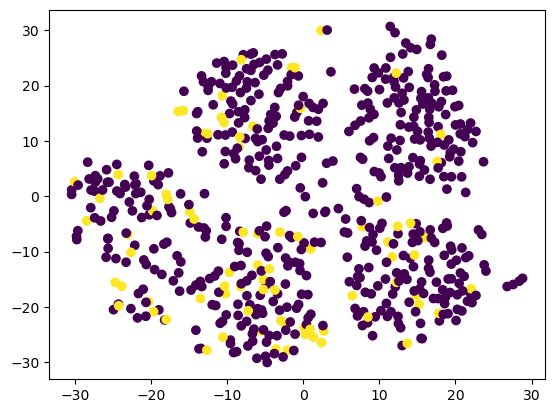

In [73]:
plt.scatter(df['X'],df['y'], c = df['MYOPIC'])
plt.show()

### Subsummary

After executing PCA and t_SNE to apply dimensionality reduction, unfortunately, the result showed there were no distinct clusters. Then I will try the K-means method to get the best number of clusters(the elbow).

## Perform a Cluster Analysis with K-means

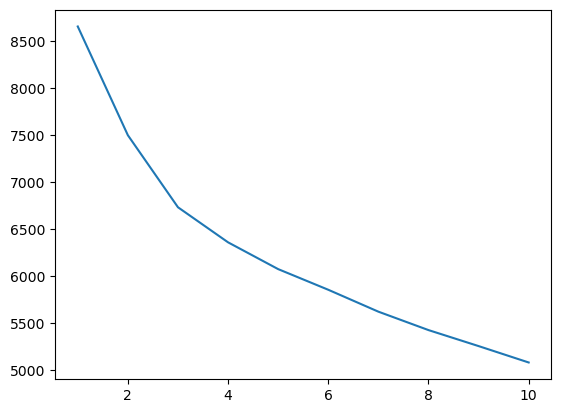

In [74]:
k = [i for i in range(1,11)]
inertia = []

for j in k:
    km = KMeans(n_clusters=j, random_state=195)
    km.fit(scaled_df)
    inertia.append(km.inertia_)

plt.plot(k, inertia)
plt.show()

In [80]:
pcaFor3 = PCA(n_components=3)
cluster3 = pd.DataFrame(pcaFor3.fit_transform(scaled_df))
cluster3.columns=['Principal Component 1','Principal Component 2','Principal Component 3']
cluster3


,Principal Component 1,Principal Component 2,Principal Component 3
0,0.535503,1.145004,-1.385019
1,-0.624706,-1.575786,-0.794253
2,-0.933479,-0.717076,0.820150
3,0.106354,1.192475,-0.024441
4,-0.388503,-2.839655,-0.229767
...,...,...,...
613,-0.237547,1.146547,-1.546054
614,-0.649011,-1.796952,-0.823592
615,-0.890082,-2.308005,0.268102
616,-1.124000,0.451890,0.001659


In [81]:
# the best n_clusters is 3
km_model = KMeans(n_clusters=3,random_state=195)
km_model.fit(scaled_df)
prediction = km_model.predict(scaled_df)
cluster3['Class']= km_model.labels_
cluster3

,Principal Component 1,Principal Component 2,Principal Component 3,Class
0,0.535503,1.145004,-1.385019,1
1,-0.624706,-1.575786,-0.794253,0
2,-0.933479,-0.717076,0.820150,1
3,0.106354,1.192475,-0.024441,1
4,-0.388503,-2.839655,-0.229767,0
...,...,...,...,...
613,-0.237547,1.146547,-1.546054,1
614,-0.649011,-1.796952,-0.823592,0
615,-0.890082,-2.308005,0.268102,0
616,-1.124000,0.451890,0.001659,1


In [83]:
import plotly.express as px


fig = px.scatter_3d(
    cluster3,
    x = 'Principal Component 1',
    y= 'Principal Component 2',
    z = 'Principal Component 3',
    color = cluster3['Class'],
    width=800
)

fig.show()

## Summary


As the combination of PCA and t_SNE could not help me to classify the data into a few clusters, I tried to use another combination, K-means and PCA. Instead of doing too much dimensionality reduction, use K-means to determine the best number of clusters for the data set and then use PCA to generate 3 principle components. From the output above, there are three distinctive clusters.